En la tarea, se sugiere aplicar PCA a los datos de salida 3D que están contenidos en el archivo `client_segmentation.csv`. El archivo contiene información sobre los clientes del operador sobre cómo cambió el consumo de servicios del operador durante dos meses:
* call_diff compartir llamadas
* sms_diff compartir SMS
* compartir tráfico de Internet traffic_diff

Todos los indicadores se calculan mediante la fórmula

$$
\frac{\text{newvalue}-\text{oldvalue}}{\text{oldvalue}}
$$

La Última columna de customes_class contiene una etiqueta de salida:
* $0$ - usuario activo
* $1$ - usuario "dormido" (rara vez usa los servicios)
* $2$ - usuario que se fue a la salida

In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



df = pd.read_csv("datasets_de_casa/client_segmentation.csv", sep=',')
df

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0
...,...,...,...,...
95,1.506425,-0.483638,2.096115,1.0
96,-1.948987,-2.192459,0.943793,2.0
97,-1.384253,1.522339,2.854824,0.0
98,1.957208,0.429976,2.750221,1.0


1. Renderice la primera y tercera columna del conjunto de datos 'call_diff' y'traffic_diff ' como una dispersión
2. Construya PCA apriételos a un caso unidimensional, visualice el resultado

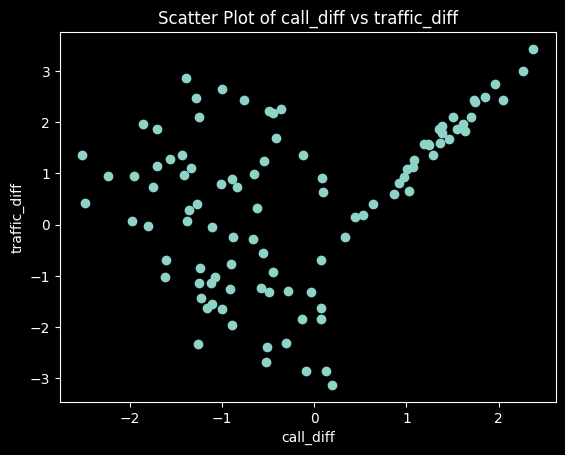

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visualizar la dispersión de 'call_diff' y 'traffic_diff' con colores según 'customes_class'
plt.scatter(df['call_diff'], df['traffic_diff'])
plt.xlabel('call_diff')
plt.ylabel('traffic_diff')
plt.title('Scatter Plot of call_diff vs traffic_diff')
plt.show()

In [48]:
# Preprocesar los datos para PCA
features = ['call_diff', 'traffic_diff']
x = df[features].values
x = StandardScaler().fit_transform(x)

In [49]:
# Aplicar PCA y reducir a un componente principal
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)
df['PC1'] = principal_components
df

,call_diff,sms_diff,traffic_diff,customes_class,PC1
0,-0.666421,0.444911,-0.273538,0.0,-0.594020
1,-0.889273,-0.537896,-1.959469,2.0,-1.480874
2,-0.841503,0.846665,0.727606,0.0,-0.244988
3,1.389749,0.390911,1.789246,1.0,1.521441
4,-1.228211,-1.375899,-1.434209,2.0,-1.440494
...,...,...,...,...,...
95,1.506425,-0.483638,2.096115,1.0,1.726837
96,-1.948987,-2.192459,0.943793,2.0,-0.787594
97,-1.384253,1.522339,2.854824,0.0,0.397994
98,1.957208,0.429976,2.750221,1.0,2.281394


In [50]:
PC1_new = pca.inverse_transform(principal_components) # transformación inversa

In [51]:
PC1_new

array([[-0.42003572, -0.42003572],
       [-1.04713619, -1.04713619],
       [-0.17323241, -0.17323241],
       [ 1.07582144,  1.07582144],
       [-1.01858311, -1.01858311],
       [ 0.32164496,  0.32164496],
       [ 0.94551821,  0.94551821],
       [-0.82904573, -0.82904573],
       [-1.05271538, -1.05271538],
       [ 0.40337969,  0.40337969],
       [-0.16216255, -0.16216255],
       [-0.00254828, -0.00254828],
       [ 0.63135356,  0.63135356],
       [ 1.81625228,  1.81625228],
       [-0.52653526, -0.52653526],
       [-0.83765954, -0.83765954],
       [ 0.94271701,  0.94271701],
       [ 0.73140128,  0.73140128],
       [-0.60343255, -0.60343255],
       [ 1.4116268 ,  1.4116268 ],
       [ 0.18453504,  0.18453504],
       [ 0.09737186,  0.09737186],
       [-0.69014729, -0.69014729],
       [ 1.2243066 ,  1.2243066 ],
       [ 1.54872254,  1.54872254],
       [ 1.06582539,  1.06582539],
       [-1.12723279, -1.12723279],
       [-0.46010422, -0.46010422],
       [-0.33166689,

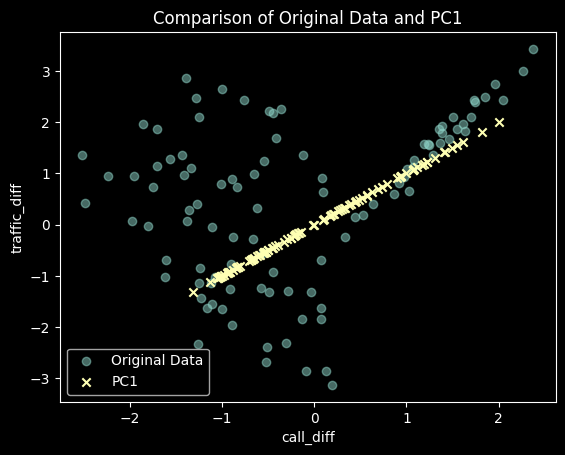

In [52]:
plt.scatter(df['call_diff'], df['traffic_diff'], label='Original Data', alpha=0.5)
plt.xlabel('call_diff')
plt.ylabel('traffic_diff')

# Superponer el gráfico de la nueva dimensión principal 'PC1'
plt.scatter(PC1_new[:, 0], PC1_new[:, 1], label='PC1', marker='x')

plt.title('Comparison of Original Data and PC1')
plt.legend()
plt.show()

***Descomposición SVD***

1) Dada una matriz A, calcule la descomposición SVD usando la función numpy.linalg.svd. Encuentre el determinante de la matriz U usando la función numpy.linalg.det. ¿Cuál es el determinante?

In [53]:
from numpy.linalg import svd, det
import numpy as np

A = np.array([[3,2,2],[2,3,-2]])
A_det = A

In [54]:
# Calcular la descomposición SVD
U, Sigma, Vt = np.linalg.svd(A)

det_U = np.linalg.det(U)

print("Matriz U:") #  es una matriz ortogonal cuyas filas son los autovectores de la matriz 
print(U)

print("\nSingular Values (Sigma):") #  es una matriz diagonal con los valores singulares en la diagonal
print(Sigma)

print("\nMatriz Vt:") #  es la matriz ortogonal transpuesta cuyas filas son los autovectores
print(Vt)

print("\nDeterminante de matrizы U:", det_U)

Matriz U:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Singular Values (Sigma):
[5. 3.]

Matriz Vt:
[[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]

Determinante de matrizы U: -1.0000000000000004


2) Carguemos la imagen en una matriz tridimensional tridimensional y mostrémosla directamente en el cuaderno Jupyter.

pip install Pillow

<class 'numpy.ndarray'> (2160, 1620, 3)


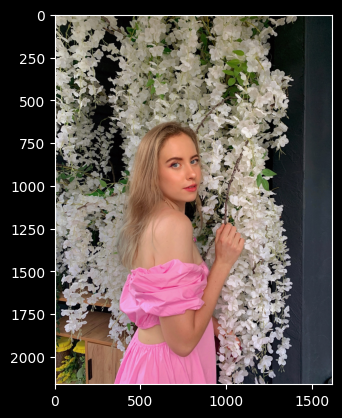

In [55]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('images/XBUK5GIP_PY.jpg')
print(type(img),img.shape)
imshow(img)
plt.show()

Tenemos una matriz tridimensional, donde la tercera dimensión corresponde al componente de color rgb. Una imagen en color se puede convertir a gris bidimensional (escala de grises)

<class 'numpy.ndarray'> (2160, 1620)


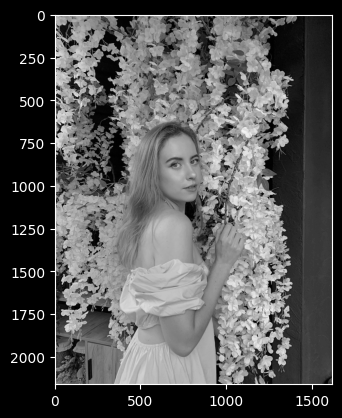

In [56]:
def rgb2gray(rgb):
    '''Se toma el promedio de tres colores RGB'''
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0], rgb.shape[1], 1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap="gray")
plt.show()

In [57]:
shape_of_img_gray = img_gray.shape
print("Dimensionalidad de la matriz img_gray:", shape_of_img_gray)

Dimensionalidad de la matriz img_gray: (2160, 1620)


* enseñar la clase TruncatedSVD con el parámetro n_components=25 sobre la matriz *img_gray* de dimensión (2160, 1620)
* obtener la matriz *img_gray_svd* usando la función `transform`
* obtener la matriz *img_gray_svd_restaurada* usando la función `inverse_transform`
* visualizar la matriz *img_gray_svd_restored* con la función *imshow

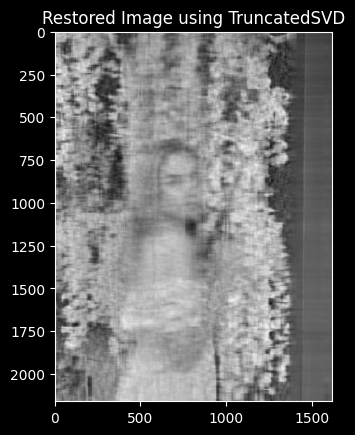

In [58]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


svd = TruncatedSVD(n_components=25)
img_gray_svd = svd.fit_transform(img_gray)

img_gray_svd_restored = svd.inverse_transform(img_gray_svd)

# Визуализируем восстановленный массив
plt.imshow(img_gray_svd_restored, cmap='gray')
plt.title('Restored Image using TruncatedSVD')
plt.show()

Este algoritmo demuestra cómo se comprimen los datos de alta dimensión.

***Transformación t-SNE***

In [59]:
df

,call_diff,sms_diff,traffic_diff,customes_class,PC1
0,-0.666421,0.444911,-0.273538,0.0,-0.594020
1,-0.889273,-0.537896,-1.959469,2.0,-1.480874
2,-0.841503,0.846665,0.727606,0.0,-0.244988
3,1.389749,0.390911,1.789246,1.0,1.521441
4,-1.228211,-1.375899,-1.434209,2.0,-1.440494
...,...,...,...,...,...
95,1.506425,-0.483638,2.096115,1.0,1.726837
96,-1.948987,-2.192459,0.943793,2.0,-0.787594
97,-1.384253,1.522339,2.854824,0.0,0.397994
98,1.957208,0.429976,2.750221,1.0,2.281394


In [60]:
X = df[['call_diff','sms_diff','traffic_diff']].values
y = df.customes_class.values

df.head()

,call_diff,sms_diff,traffic_diff,customes_class,PC1
0,-0.666421,0.444911,-0.273538,0.0,-0.594020
1,-0.889273,-0.537896,-1.959469,2.0,-1.480874
2,-0.841503,0.846665,0.727606,0.0,-0.244988
3,1.389749,0.390911,1.789246,1.0,1.521441
4,-1.228211,-1.375899,-1.434209,2.0,-1.440494


Realicemos la compresión de datos utilizando la implementación **sklearn.manifold.TSNE**:

In [61]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)

x_tsne[:10]

array([[ 2.398123  ,  1.1358598 ],
       [ 6.798633  ,  3.6281364 ],
       [ 0.44836232,  0.4298366 ],
       [ 1.6441963 , -5.2216644 ],
       [ 6.379106  ,  5.1790476 ],
       [ 0.4788809 , -1.4513017 ],
       [ 2.5208993 , -4.8626094 ],
       [ 5.7230597 ,  4.1575127 ],
       [ 6.616244  ,  4.5202413 ],
       [-2.1487696 , -0.63265175]], dtype=float32)

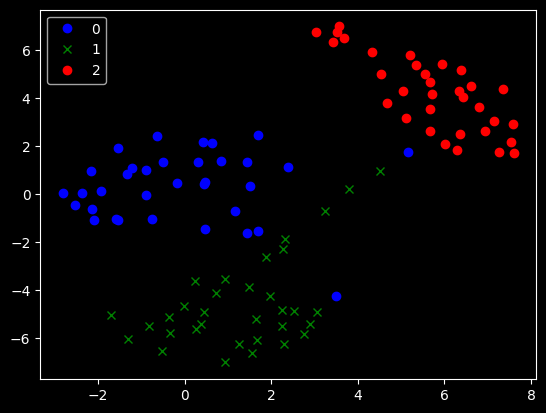

In [62]:
num_labels = len(np.unique(y))

colors = ['bo', 'gx', 'ro']
# И нарисуем получившиеся точки в нашем новом пространстве
for name, label, color in [('class_%d' % i, i, colors[i]) for i in range(num_labels)]:
    plt.plot(x_tsne[y == label, 0], x_tsne[y == label, 1], color, label=label)
plt.legend(loc=0)

Visualmente, los datos se han vuelto más separables

Veamos cómo t-sne puede mejorar sus modelos. Primero, carguemos los datos y construyamos un modelo de referencia sin transformar los datos de entrada.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Entrenamiento y validación del modelo"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Tomemos como ejemplo un árbol de decisión poco profundo
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = df
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [64]:
eval_model(X, y)

Accuracy: 0.80000


***Transformación de PCA:***

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("PCA Transformation:")
eval_model(X_pca, y)

PCA Transformation:
Accuracy: 0.83333


***Transformación t-SNE:***

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

print("t-SNE Transformation:")
eval_model(X_tsne, y)

t-SNE Transformation:
Accuracy: 0.86667


PCA Transformation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.80      0.80      0.80        10
         2.0       1.00      0.80      0.89        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.84        30
weighted avg       0.85      0.83      0.84        30


Confusion Matrix:
[[9 1 0]
 [2 8 0]
 [1 1 8]]

Feature Importances:
[0.56473419 0.43526581]


IndexError: list index out of range

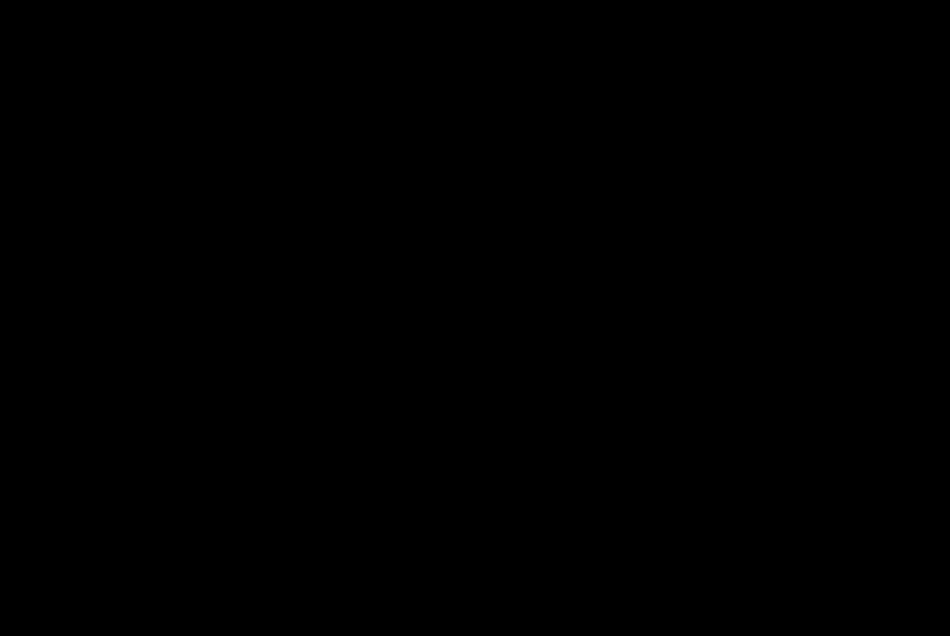

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

def eval_model_extended(input_x, input_y):
    """Обучаем и валидируем модель, выводим дополнительные метрики"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    
    # Выводим основные метрики классификации
    print("Classification Report:")
    print(classification_report(y_test, preds))
    
    # Выводим матрицу ошибок
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, preds))
    
    # Выводим важность признаков для дерева решений
    print("\nFeature Importances:")
    print(clf.feature_importances_)
    
    # Визуализируем дерево решений (если необходимо)
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=['call_diff', 'sms_diff', 'traffic_diff'], class_names=['class_0', 'class_1'])
    plt.show()

# Оценим модель с PCA преобразованием
print("PCA Transformation:")
eval_model_extended(X_pca, y)

# Оценим модель с t-SNE преобразованием
print("\nt-SNE Transformation:")
eval_model_extended(X_tsne, y)
